In [1]:
import csv
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
import geopandas as gpd
# set default
pio.templates.default = "plotly_dark"

In [2]:
# read data
df = pd.read_csv('All_States_GE.csv')
df

ed_map = {
    "Others": 0,
    "Illiterate": 1,
    "Literate": 2,
    "5th Pass": 3,
    "8th Pass": 4,
    "10th Pass": 5,
    "12th Pass": 6,
    "Graduate": 7,
    "Graduate Professional": 8,
    "Post Graduate": 9,
    "Doctorate": 10
}

C:\Users\Rahul\AppData\Local\Temp\ipykernel_31804\2377711653.py:2: DtypeWarning: Columns (17,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('All_States_GE.csv')


In [3]:
# drop rows where sex is NaN
fdf = df.dropna(subset=["Sex", "Votes"])
# Convert M and F to int values
sex_mapping = {"M": 0, "F": 1, "NOTA": 2, "male": 0, "MALE": 0, "female": 1, "FEMALE": 1} 
fdf["SexInt"] = fdf["Sex"].map(sex_mapping)
fdf["EducationInt"] = fdf["MyNeta_education"].map(ed_map)
fdf

C:\Users\Rahul\AppData\Local\Temp\ipykernel_31804\3665183874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf["SexInt"] = fdf["Sex"].map(sex_mapping)
C:\Users\Rahul\AppData\Local\Temp\ipykernel_31804\3665183874.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf["EducationInt"] = fdf["MyNeta_education"].map(ed_map)


,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,...,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Election_Type,SexInt,EducationInt
0,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,1,KULDEEP RAI SHARMA,M,...,False,True,Graduate Professional,Business,NaN,Social Work,NaN,Lok Sabha Election (GE),0.0,8.0
1,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,2,VISHAL JOLLY,M,...,False,False,Graduate Professional,Liberal Profession or Professional,Lawyer,NaN,NaN,Lok Sabha Election (GE),0.0,8.0
2,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,3,PARITOSH KUMAR HALDAR,M,...,False,False,Post Graduate,Agriculture,NaN,NaN,NaN,Lok Sabha Election (GE),0.0,9.0
3,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,4,SANJAY MESHACK,M,...,False,True,12th Pass,Business,NaN,Politics,Municipality Member,Lok Sabha Election (GE),0.0,6.0
4,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,5,PRAKASH MINJ,M,...,False,False,Post Graduate,Social Work,NaN,NaN,NaN,Lok Sabha Election (GE),0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91646,Uttar_Pradesh,3,56,1964,NaN,1,1,1,V.L.PANDIT,F,...,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE),1.0,NaN
91651,Andhra_Pradesh,3,40,1965,NaN,1,1,1,R.S.REDDY,M,...,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE),0.0,NaN
91657,Mysore,3,19,1965,NaN,1,1,1,MALIMARIYAPPA,M,...,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE),0.0,NaN
91658,Mysore,3,19,1965,NaN,1,1,2,K.V.SUBRAMANYASWAMY,M,...,False,True,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE),0.0,NaN


In [4]:
# if someone has more votes, they are more likely to contest again. And if someone is contesting again, they are more likely to have more votes.
fdf["Votes"].corr(fdf["Contested"])

0.3741060992746316

In [5]:
# avg of votes for women and men sectioned by Election Number
elNumMFDict = {}
for i in range(len(fdf)):
    elNum = fdf.iloc[i]["Assembly_No"]
    if elNum not in elNumMFDict:
        elNumMFDict[elNum] = [0, 0, 0, 0]

    if fdf.iloc[i]["SexInt"] == 0:
        elNumMFDict[elNum][0] += fdf.iloc[i]["Votes"]
        elNumMFDict[elNum][1] += 1
    elif fdf.iloc[i]["SexInt"] == 1:
        elNumMFDict[elNum][2] += fdf.iloc[i]["Votes"]
        elNumMFDict[elNum][3] += 1


In [6]:
avgDict = {}
for elNum in elNumMFDict:
    avgDict[elNum] = [elNumMFDict[elNum][0] / elNumMFDict[elNum][1],
                      elNumMFDict[elNum][2] / elNumMFDict[elNum][3]]
    
avgDict

# plot 2 line graphs
keys = list(avgDict.keys())
line1 = [point[0] for point in avgDict.values()]
line2 = [point[1] for point in avgDict.values()]

fig = go.Figure()

fig.add_trace(go.Scatter(x=keys, y=line1, mode='lines', name='Male'))
fig.add_trace(go.Scatter(x=keys, y=line2, mode='lines', name='Female'))

fig.update_layout(title='Male and Female Average Votes',
                  xaxis_title='X Axis',
                  yaxis_title='Values',
                  hovermode='x')

fig.show()
# save html
fig.write_html("./output/avgVotesGender.html")

In [7]:
stateDict = {} # State -> Assembly Number
for i in range(len(fdf)):
    state = fdf.iloc[i]["State_Name"]
    if state not in stateDict:
        stateDict[state] = {}
    elNum = fdf.iloc[i]["Assembly_No"]
    if elNum not in stateDict[state]:
        stateDict[state][elNum] = [0, 0, 0, 0]

    if fdf.iloc[i]["SexInt"] == 0:
        stateDict[state][elNum][0] += fdf.iloc[i]["Votes"]
        stateDict[state][elNum][1] += 1
    elif fdf.iloc[i]["SexInt"] == 1:
        stateDict[state][elNum][2] += fdf.iloc[i]["Votes"]
        stateDict[state][elNum][3] += 1

stateDict

{'Andaman_&_Nicobar_Islands': {17: [205266.0, 14, 618.0, 1],
  16: [185330.0, 13, 3434.0, 2],
  15: [165407.0, 10, 4696.0, 1],
  14: [151461.0, 11, 2364.0, 1],
  13: [144776.0, 4, 1015.0, 1],
  12: [145836.0, 6, 0, 0],
  11: [128212.0, 11, 0, 0],
  10: [107316.0, 5, 0, 0],
  9: [112512.0, 6, 553.0, 1],
  8: [77882.0, 5, 11086.0, 1],
  7: [78899.0, 10, 0, 0],
  6: [60568.0, 2, 0, 0],
  5: [44525.0, 5, 0, 0],
  4: [36732.0, 6, 0, 0]},
 'Andhra_Pradesh': {17: [28152510.0, 316, 4080461.0, 31],
  16: [45536785.0, 562, 3868378.0, 43],
  15: [38550139.0, 531, 4032754.0, 39],
  14: [36162200.0, 304, 4217868.0, 25],
  13: [30254823.0, 269, 3487118.0, 19],
  12: [30015915.0, 372, 1882996.0, 18],
  11: [28222260.0, 1375, 2951102.0, 92],
  10: [24301378.0, 585, 2107428.0, 26],
  9: [26419821.0, 260, 2345098.0, 7],
  8: [21322242.0, 294, 1470602.0, 9],
  7: [15811675.0, 259, 1096117.0, 12],
  6: [16849778.0, 166, 500318.0, 4],
  5: [12634926.0, 200, 438457.0, 7],
  4: [13136073.0, 161, 611488.0, 4]

In [8]:
stateAvgDict = {}
for state in stateDict:
    stateAvgDict[state] = {}
    for elNum in stateDict[state]:
        stateAvgDict[state][elNum] = [stateDict[state][elNum][0] / (1 if stateDict[state][elNum][1] == 0 else stateDict[state][elNum][1]),
                                      stateDict[state][elNum][2] / (1 if stateDict[state][elNum][3] == 0 else stateDict[state][elNum][3])]
        
stateAvgDict

{'Andaman_&_Nicobar_Islands': {17: [14661.857142857143, 618.0],
  16: [14256.153846153846, 1717.0],
  15: [16540.7, 4696.0],
  14: [13769.181818181818, 2364.0],
  13: [36194.0, 1015.0],
  12: [24306.0, 0.0],
  11: [11655.636363636364, 0.0],
  10: [21463.2, 0.0],
  9: [18752.0, 553.0],
  8: [15576.4, 11086.0],
  7: [7889.9, 0.0],
  6: [30284.0, 0.0],
  5: [8905.0, 0.0],
  4: [6122.0, 0.0]},
 'Andhra_Pradesh': {17: [89090.22151898734, 131627.7741935484],
  16: [81026.30782918149, 89962.27906976744],
  15: [72599.131826742, 103403.94871794872],
  14: [118954.6052631579, 168714.72],
  13: [112471.46096654276, 183532.52631578947],
  12: [80687.94354838709, 104610.88888888889],
  11: [20525.28, 32077.195652173912],
  10: [41540.8170940171, 81054.92307692308],
  9: [101614.69615384615, 335014.0],
  8: [72524.63265306123, 163400.22222222222],
  7: [61048.938223938225, 91343.08333333333],
  6: [101504.68674698795, 125079.5],
  5: [63174.63, 62636.71428571428],
  4: [81590.51552795031, 152872.0]

In [9]:
dominationDict = {}
for state in stateAvgDict:
    dominationDict[state] = {}
    for elNum in stateAvgDict[state]:
        denom = (stateAvgDict[state][elNum][0] + stateAvgDict[state][elNum][1])  
        if denom == 0:
            dominationDict[state][elNum] = 0
        else:
            dominationDict[state][elNum] = 10 * (stateAvgDict[state][elNum][0] - stateAvgDict[state][elNum][1]) / (stateAvgDict[state][elNum][0] + stateAvgDict[state][elNum][1])    

dominationDict

{'Andaman_&_Nicobar_Islands': {17: 9.19109191372395,
  16: 7.850142787658138,
  15: 5.577467308951014,
  14: 7.069393965007184,
  13: 9.454433067268672,
  12: 10.0,
  11: 10.0,
  10: 10.0,
  9: 9.427091427091428,
  8: 1.6841694671147383,
  7: 10.0,
  6: 10.0,
  5: 10.0,
  4: 10.0},
 'Andhra_Pradesh': {17: -1.927235363715525,
  16: -0.522606298037128,
  15: -1.750243052330255,
  14: -1.7297678399086138,
  13: -2.400679328737143,
  12: -1.2910467392502198,
  11: -2.1960783231114913,
  10: -3.223122265733693,
  9: -5.345487044303556,
  8: -3.851887060276053,
  7: -1.9879088681824488,
  6: -1.0404438893759402,
  5: 0.04275574013930908,
  4: -3.0402081250191233,
  3: -1.516624633144854},
 'Arunachal_Pradesh': {17: 1.084924069985339,
  16: 10.000000000000002,
  15: 10.0,
  14: 10.0,
  13: 10.0,
  12: 10.0,
  11: 10.0,
  10: 10.0,
  9: 10.0,
  8: 10.0,
  7: 10.0,
  6: 10.0},
 'Assam': {17: -2.262832339360941,
  16: -1.431051571481028,
  15: -0.21196647022413848,
  14: 1.3463540002390595,
  13

In [10]:
import os
outputDir = "./output/genderDomination/" 

In [11]:
for elNum in range(1, 18):
    with open(outputDir + str(elNum) + ".txt", "w") as f:
        text = ""
        for state in dominationDict:
            if elNum in dominationDict[state]:
                text += f"INDIA\t{state.upper().replace('_', ' ').replace('ANDAMAN & NICOBAR', 'A & N')}\t{dominationDict[state][elNum]}\n"

        text += "INDIA\tUPPER\t10\nINDIA\tLOWER\t-10\n"
        f.write(text)

In [12]:
map1_to_2 = {
    "Andaman & Nicobar": "Andaman_&_Nicobar_Islands",
    "Daman and Diu and Dadra and Nagar Haveli": "Dadra & Nagar Haveli And Daman & Diu",
    "Madhya Pradesh": "Madhya_Pradesh",
    "Tamilnadu": "Tamil_Nadu",
    "Chhattishgarh": "Chhattisgarh",
    "Telengana": "Telangana",
    "Andhra Pradesh": "Andhra_Pradesh",
    "Himachal Pradesh": "Himachal_Pradesh",
    "Uttar Pradesh": "Uttar_Pradesh",
    "Arunachal Pradesh": "Arunachal_Pradesh",
    "West Bengal": "West_Bengal",
    "Jammu and Kashmir": "Jammu_&_Kashmir",
    "Ladakh": "Jammu_&_Kashmir"
}

map2_to_1 = {
    "Andaman_&_Nicobar_Islands": "Andaman & Nicobar",
    "Dadra & Nagar Haveli And Daman & Diu": "Daman and Diu and Dadra and Nagar Haveli",
    "Madhya_Pradesh": "Madhya Pradesh",
    "Tamil_Nadu": "Tamilnadu",
    "Chhattisgarh": "Chhattishgarh",
    "Telangana": "Telengana",
    "Andhra_Pradesh": "Andhra Pradesh",
    "Himachal_Pradesh": "Himachal Pradesh",
    "Uttar_Pradesh": "Uttar Pradesh",
    "Arunachal_Pradesh": "Arunachal Pradesh",
    "West_Bengal": "West Bengal",
    "Jammu_&_Kashmir": "Jammu and Kashmir",
    "Ladakh": "Jammu and Kashmir"
}

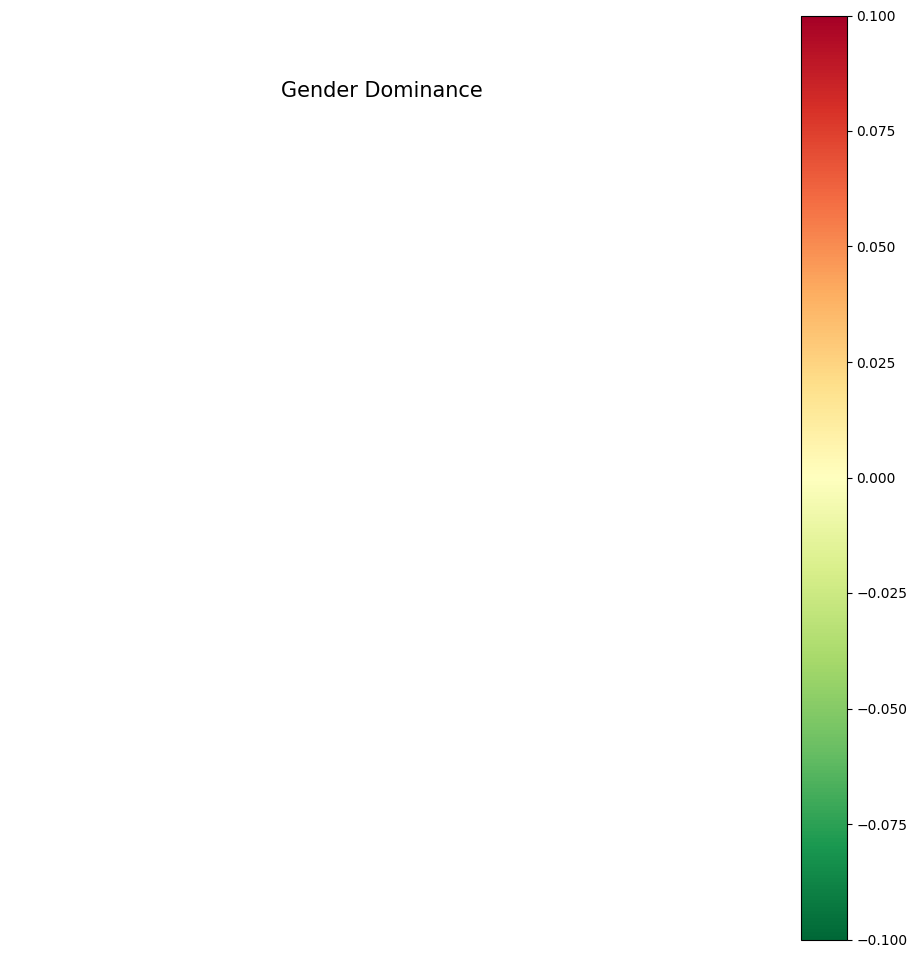

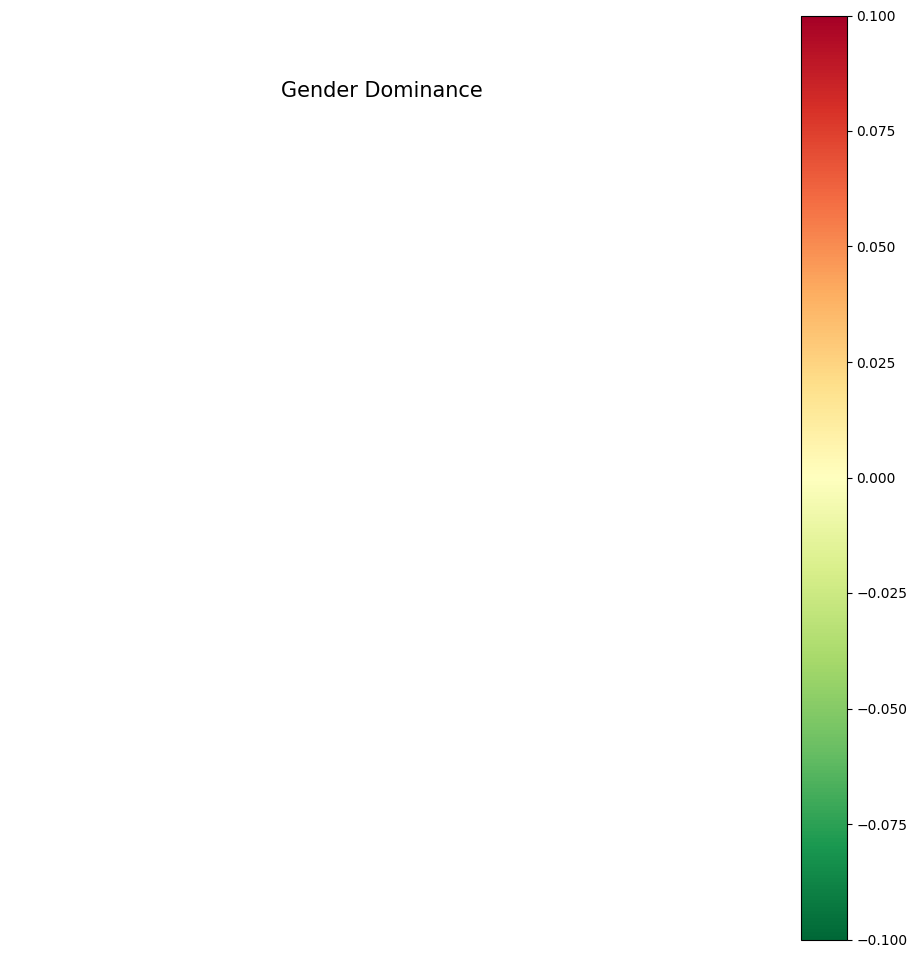

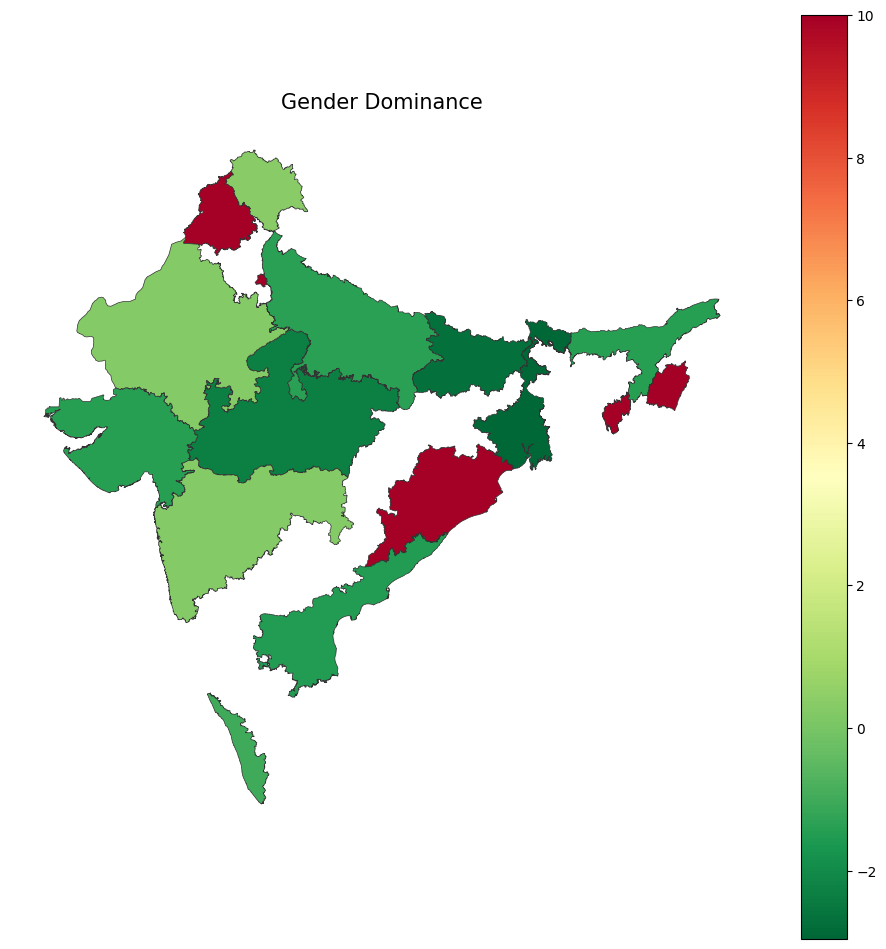

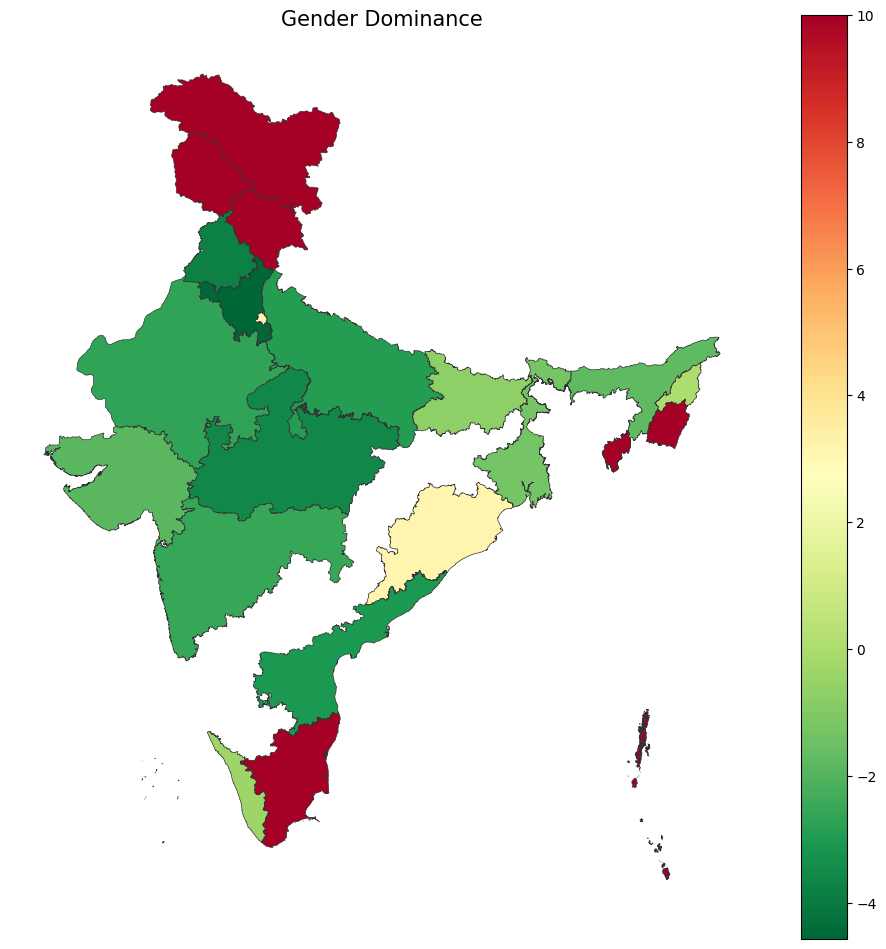

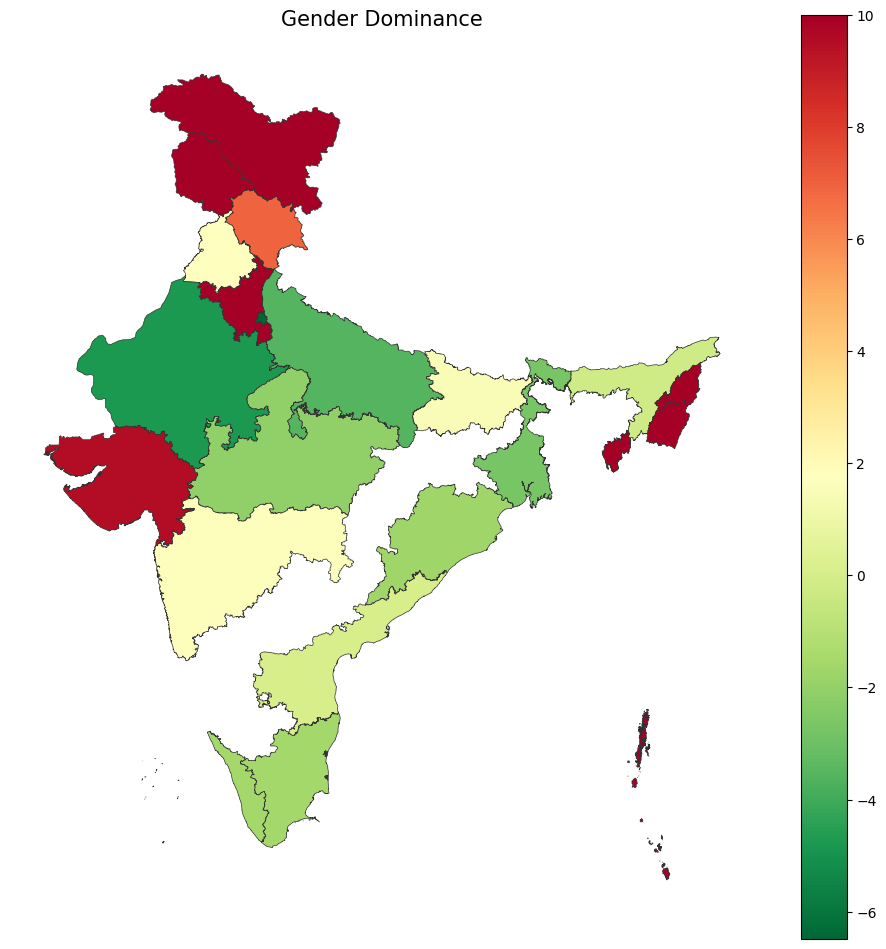

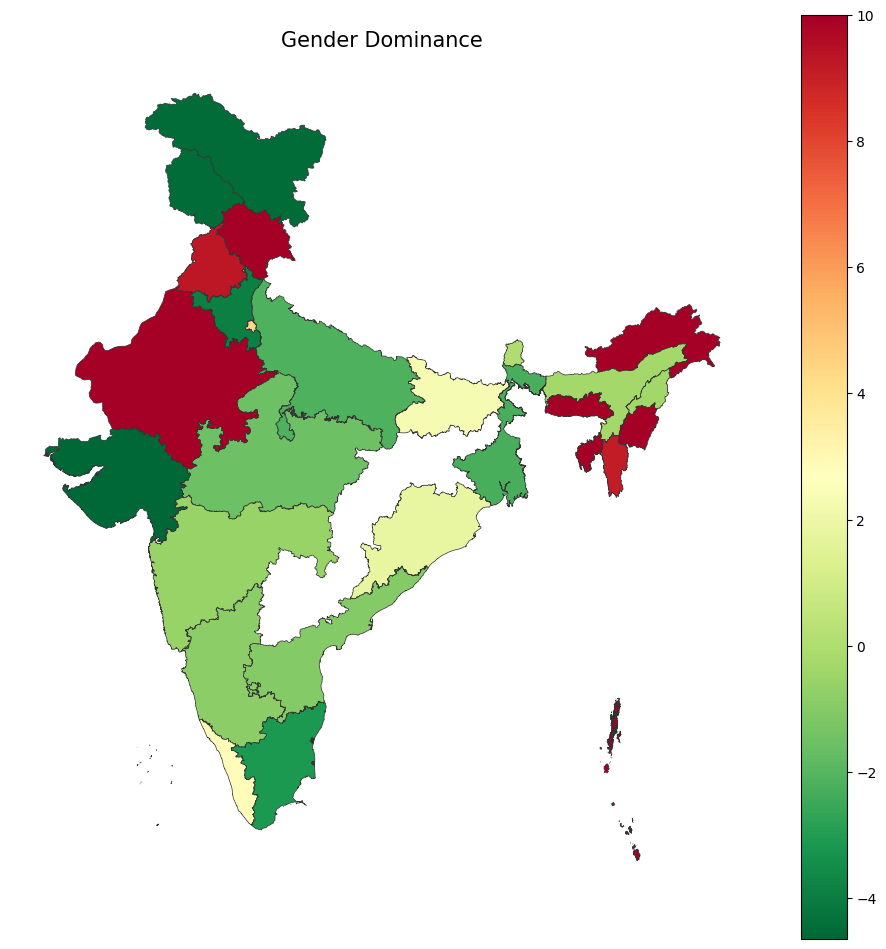

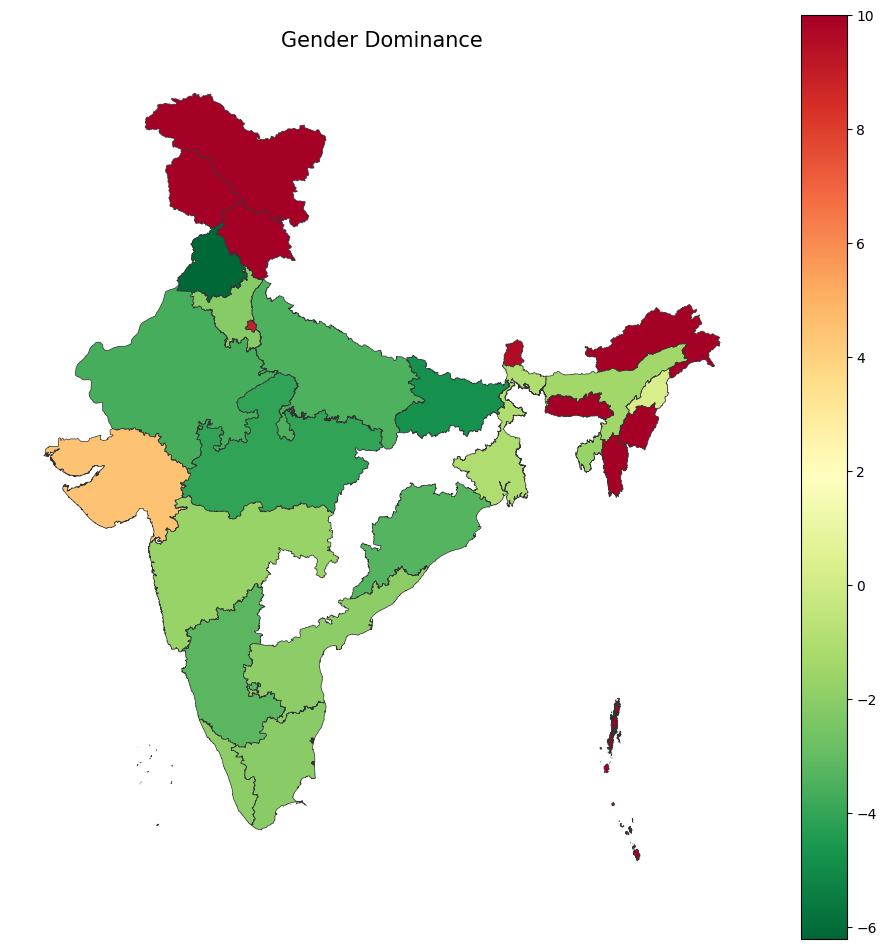

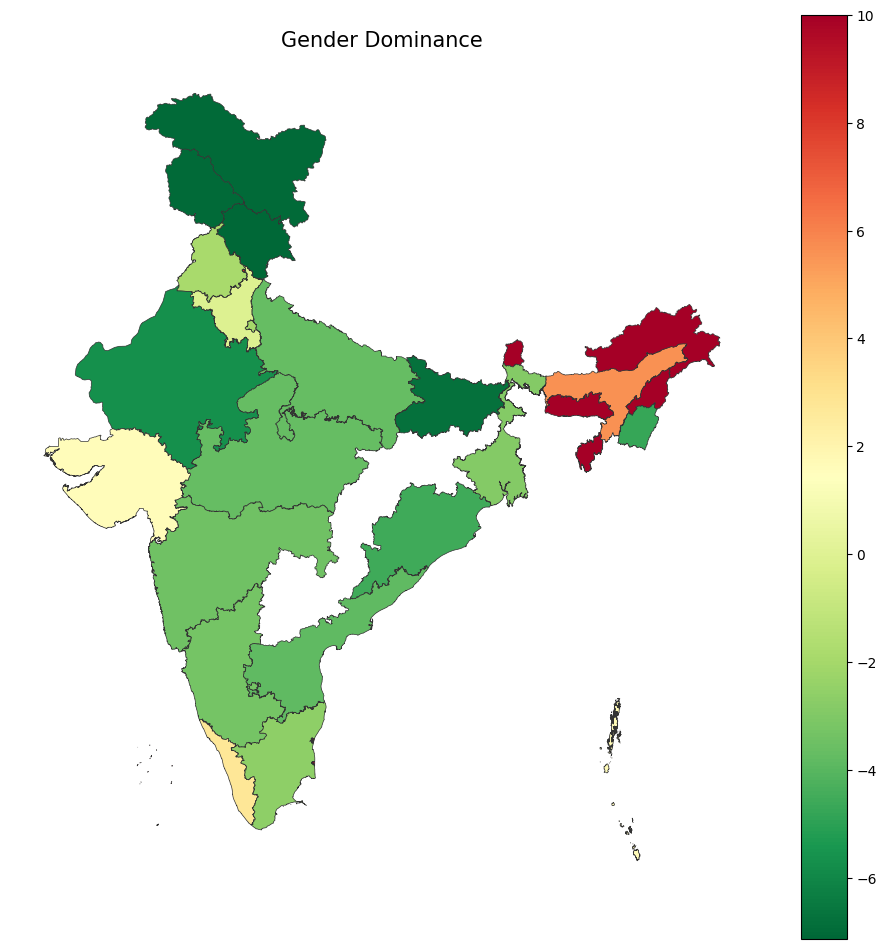

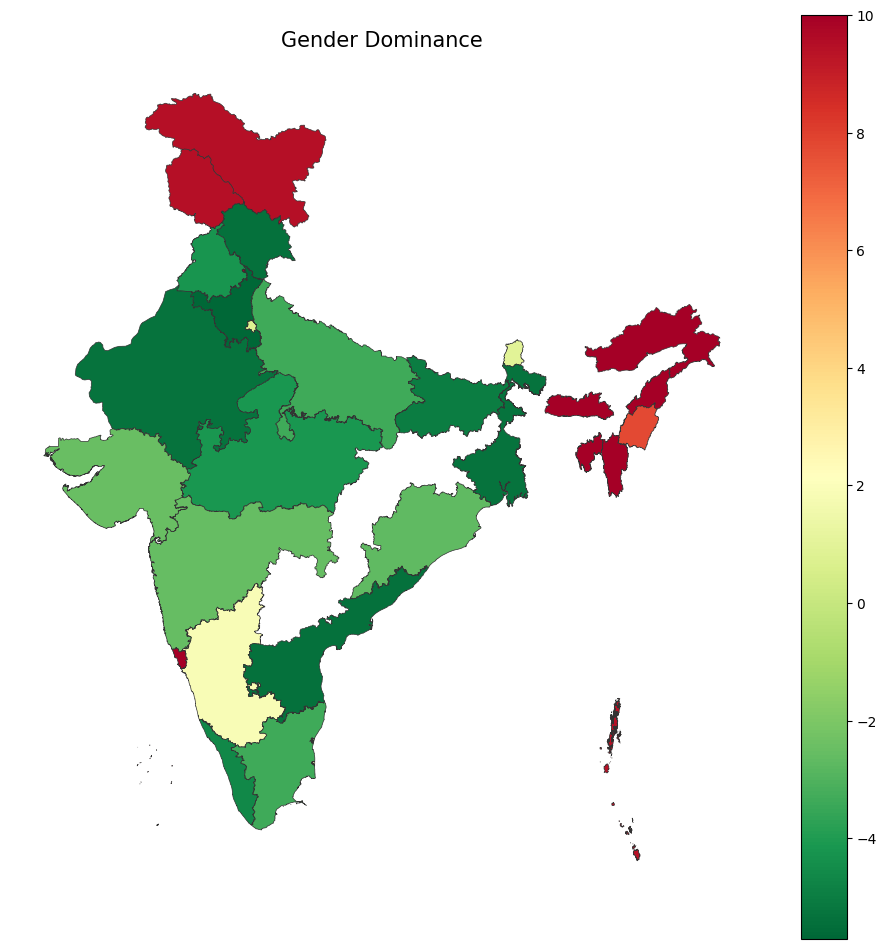

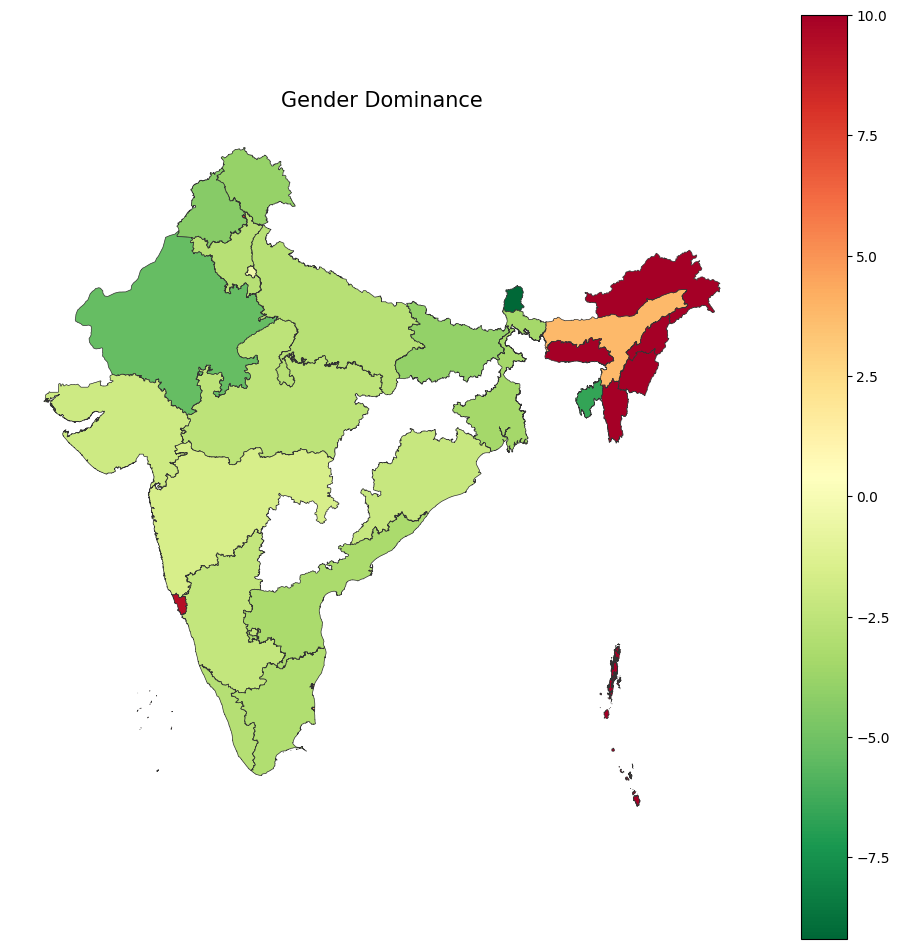

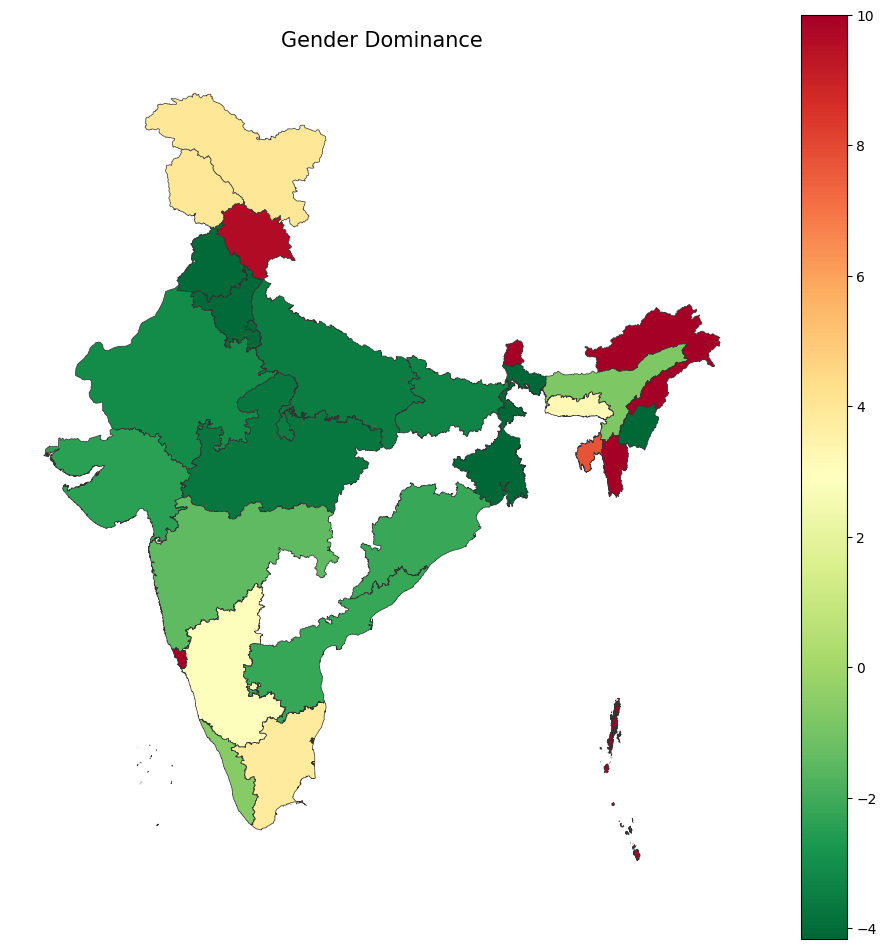

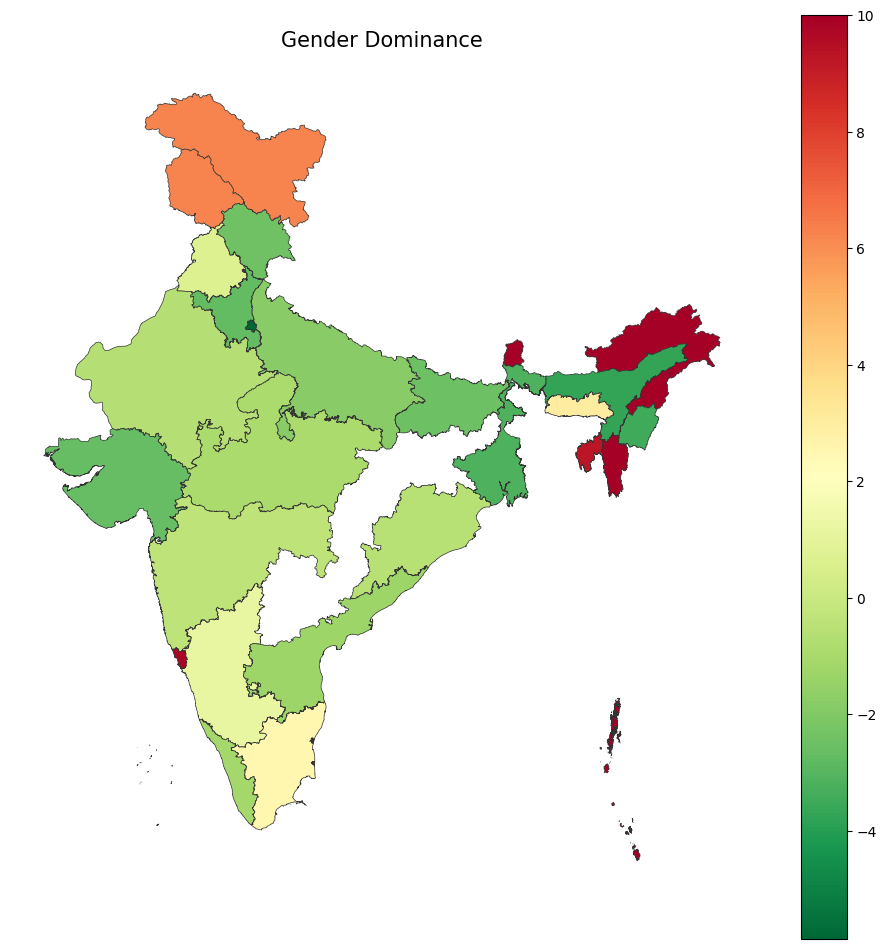

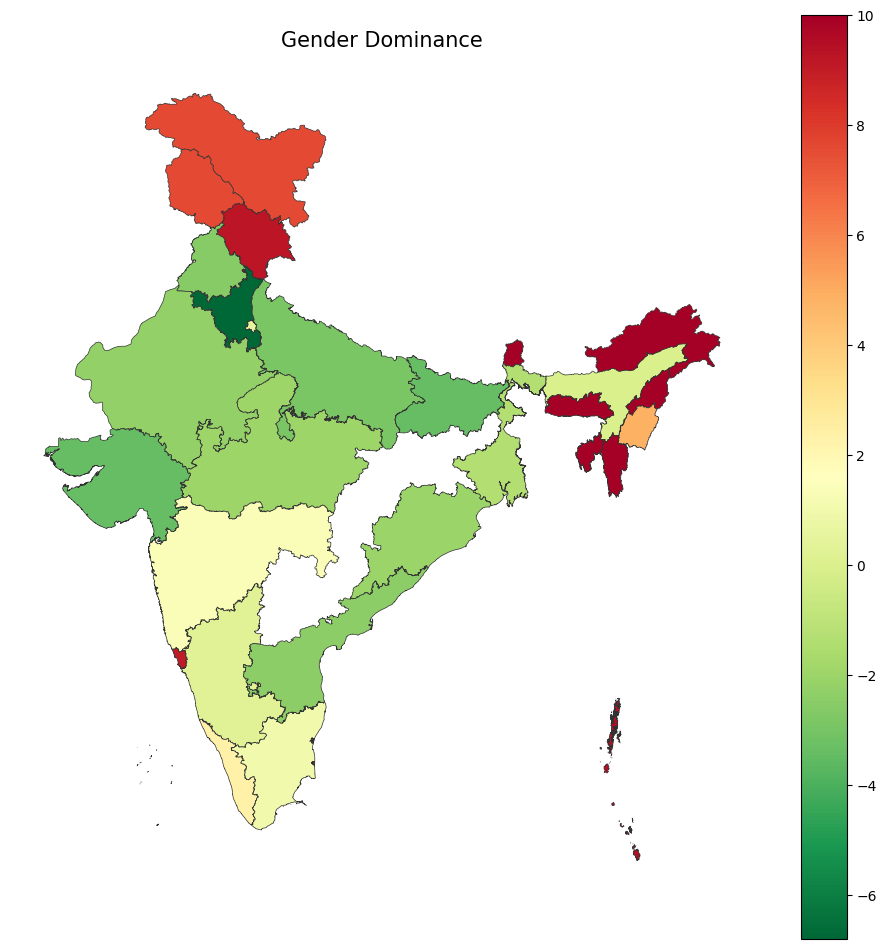

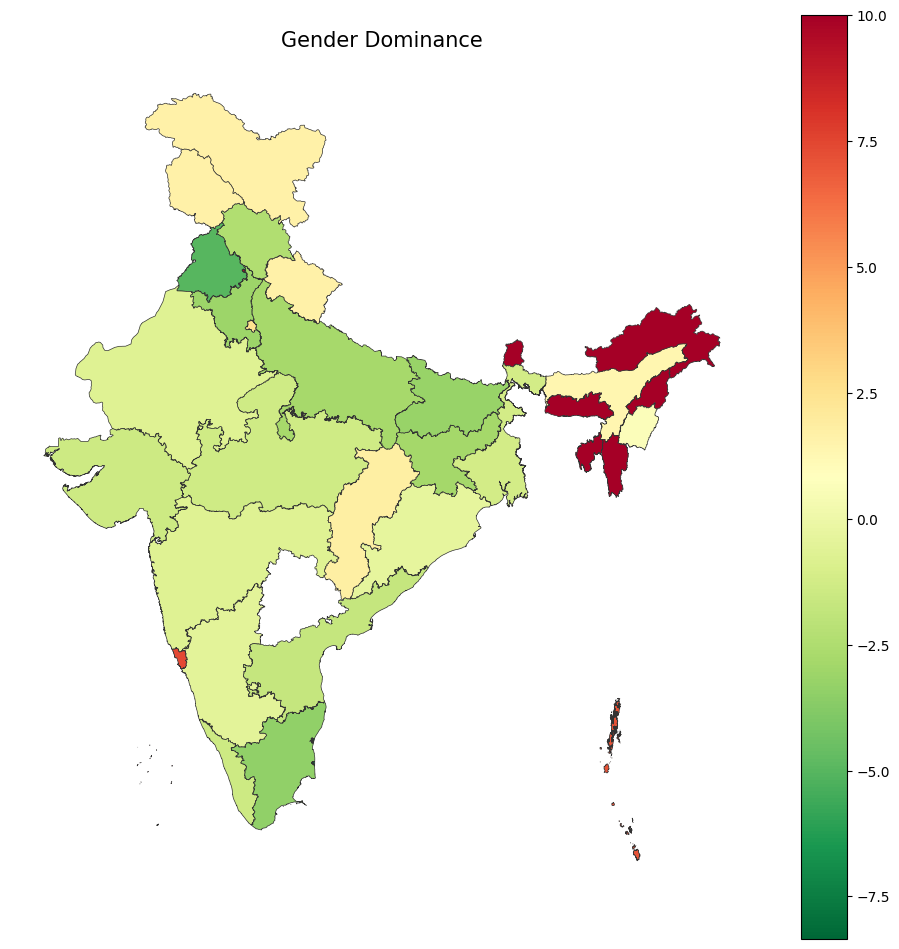

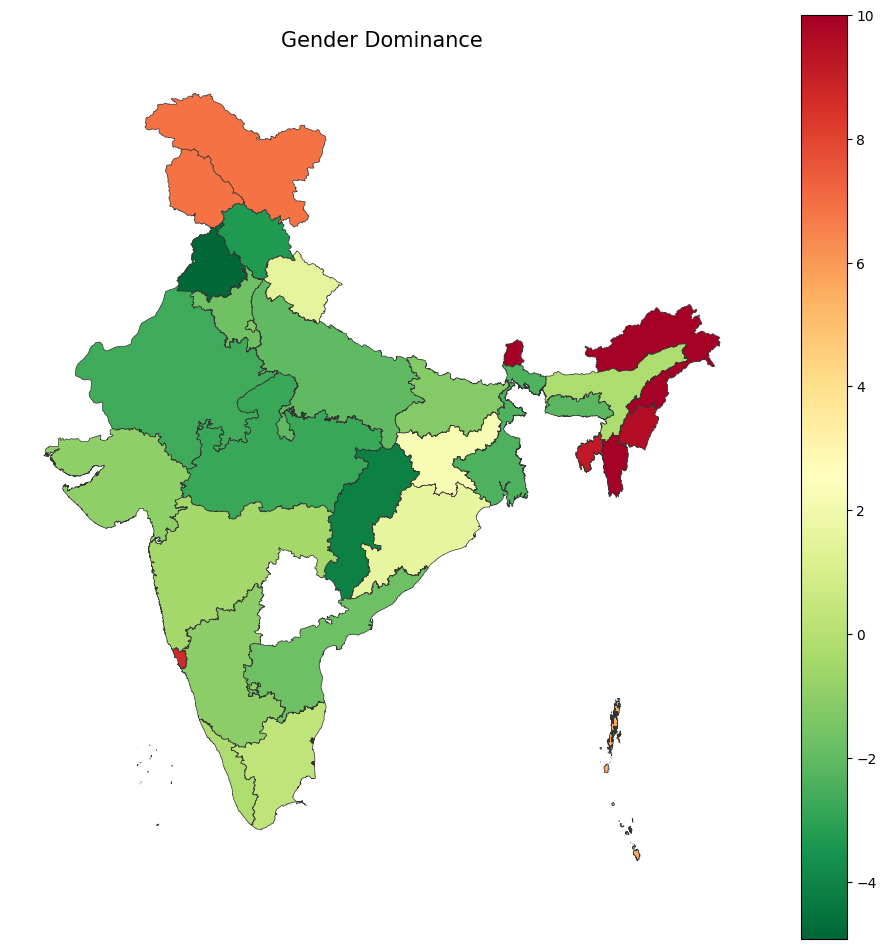

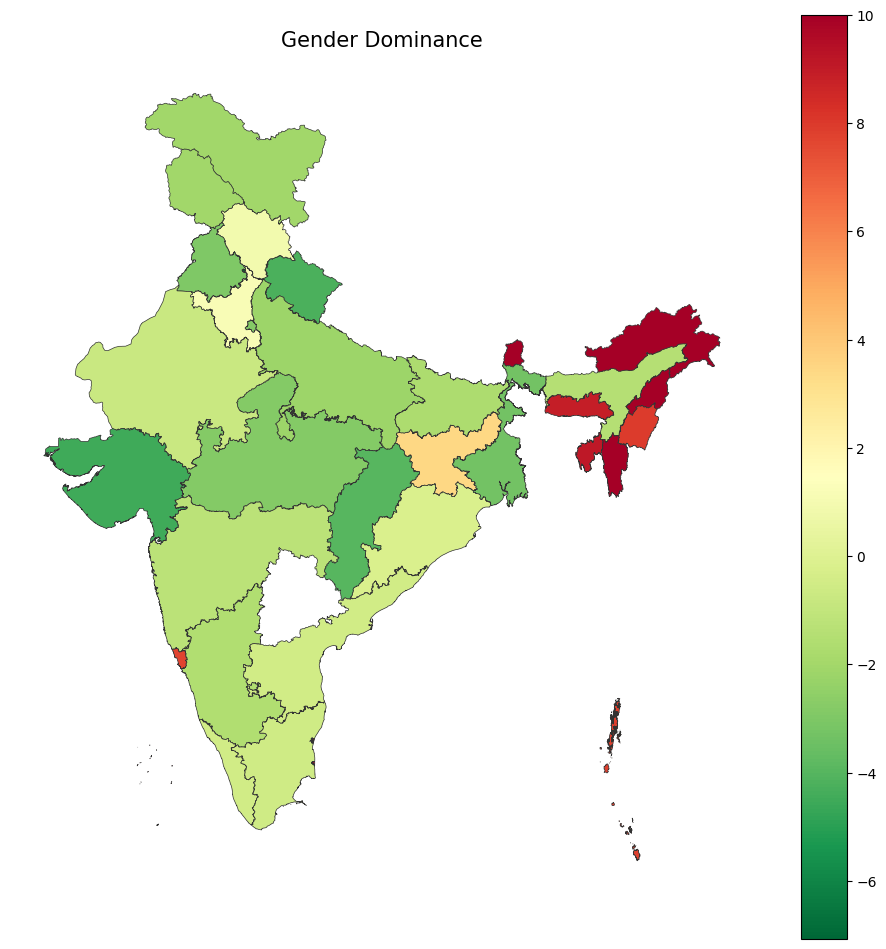

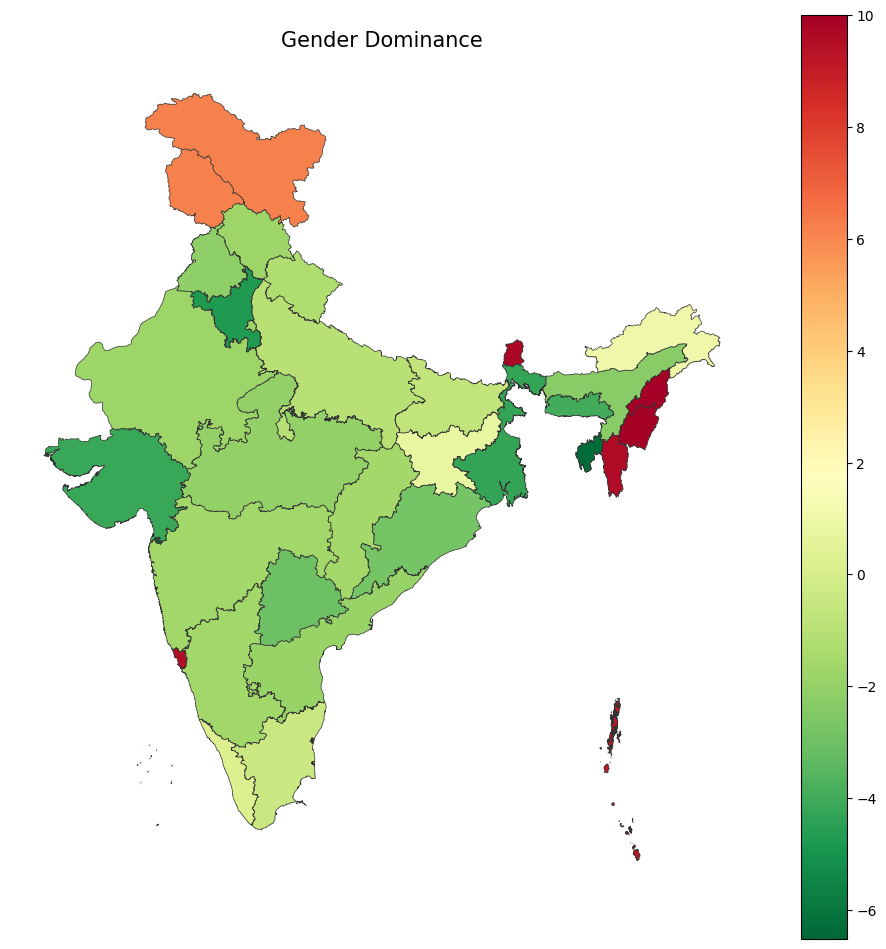

In [13]:
COL_NAME = "Gender Dominance"
geoPandasOutput = outputDir + "geoPandasOutput/"

if not os.path.exists(geoPandasOutput):
        os.makedirs(geoPandasOutput)


for elNum in range(1, 18):
    shpdf = gpd.read_file('./shapefile/India_State_Boundary.shp')
    # add empty column
    shpdf[COL_NAME] = np.nan
    # change statename
    for i in range(len(shpdf)):
        stateName = map1_to_2[shpdf.loc[i, 'State_Name']] if shpdf.loc[i, 'State_Name'] in map1_to_2 else shpdf.loc[i, 'State_Name']
        if stateName in dominationDict and elNum in dominationDict[stateName]:
            shpdf.loc[i, COL_NAME] = dominationDict[stateName][elNum]

    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.axis('off')
    ax.set_title(COL_NAME,
                fontdict={'fontsize': '15', 'fontweight' : '3'})
    fig = shpdf.plot(column=COL_NAME, cmap='RdYlGn_r', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
    # save
    fig.get_figure().savefig(geoPandasOutput + str(elNum) + ".png", dpi=300)